## Stats701-001 Homework 8: Stuctured Data
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**: Elliott helped me catch an error with my 1.6.

**Time**: Problem 1: 1 hour, Problem 2: 45 minutes, Problem 3: 45 minutes, Problem 4: 25 minutes 

### Problem 1: Regular Expressions: Warmup
**At the URL <a href="http://www.greenteapress.com/thinkpython/code/words.txt">here</a> is a list of about 100,000 English words.**  
  
**1. Use urllib to open the URL and read the file, and produce a list of ASCII strings so that each line of the file corresponds to an element of the list. You will likely need to convert the raw bytes read from the webpage to ASCII characters, for which
you should see the documentation for the string methods encode and decode. How many words are in the file?**

In [1]:
import urllib.request
from bs4 import BeautifulSoup

In [2]:
words = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt')
words2 = words.read().decode('utf-8').splitlines()

In [5]:
words2[0:5]

['aa', 'aah', 'aahed', 'aahing', 'aahs']

In [6]:
len(words2)

113809

In [7]:
words2[0:9]

['aa', 'aah', 'aahed', 'aahing', 'aahs', 'aal', 'aalii', 'aaliis', 'aals']

In [8]:
words2[-5:-1]

['zymoses', 'zymosis', 'zymotic', 'zymurgies']

There are 113,809 words in this file.

**2. It is a good habit to always look at your data to check that it makes sense. Have a look at the words in the list. Does anything jump out at you? Note: I am not requiring you to do anything specific, here. Just look at the data!**

Besides not knowing that most of these are real words, I don't think there is anything wrong with the data. For some words there are variations (past tense, plural, etc.) of the same word. 

**3. How many words from the list start with exactly four consecutive consonants? For the purposes of this specific problem, the vowels are `a, e, i, o, u, y`. Produce a list of all such words.**

In [3]:
import re
# Start the string with exactly 4 consonants. 
# Then at least 1 vowel and any number of other letters.
# OR starts with exactly four consonants and thats the entire word.
consts = re.compile(r'(^[^aeiouy]{4}[aeiouy]{1}.*$|^[^aeiouy]{4}$)')

First, let's test this regex.

In [8]:
# Test the regex
consts.match("strr") is not None

True

In [9]:
consts.match("strre") is not None

True

In [10]:
consts.match("strreak") is not None

True

In [11]:
consts.match("bad") is None

True

In [12]:
consts.match("ccccca") is None # this is 5 constants so thats bad

True

Alright, now onto the actual problem.

In [13]:
consts_words = list(filter(consts.match,words2))

In [14]:
len(consts_words)

60

There are 60 words that start with exactly four consecutive consonants.

**4. How many words contain at least four instances of the letter a (not necessarily consecutive)?**

In [4]:
# [^a]* --> 0 or more characters that are not a
# a --> match 1 a
# [^a]* --> 0 or more characters that are not a
# Match that 4 times.
a = re.compile(r'^([^a]*a[^a]*){4,}$')

In [16]:
a.match('aaaa') is not None

True

In [17]:
a.match('bananana') is not None

True

In [18]:
a.match('aaaaa') is not None # 5 a's

True

In [19]:
a.match('taylor') is None

True

In [20]:
a.match('amazinga') is None # 3 a's

True

In [21]:
a_words = list(filter(a.match, words2))

In [22]:
len(a_words)

50

There are 50 words with at least 4 instances of the letter a.

**5. How many words begin and end with a vowel with only consonants in between? For the purposes of this specific problem, `y` is neither consonant nor vowel, so consonants are the 20 letters that are not one of `a, e, i, o, u, y` and vowels are `a, e, i, o, u.` The words need not begin and end with the same vowel, so `angle` is a valid match.**

We are also going to accept words that start and end with a vowel and as nothing in between. So the word `aa` would be acceptable.

In [23]:
# Start with one vowel
# 0 or more non-vowels nor y
# End string with one vowel
start_end_vow = re.compile(r'^[aeiou]{1}[^aeiouy]*[aeiou]$')

In [24]:
start_end_vow.match('amtche') is not None

True

In [25]:
start_end_vow.match('amatchno') is None

True

In [26]:
# Does this count???
start_end_vow.match('eo') is not None

True

In [27]:
start_end_words = list(filter(start_end_vow.match, words2))

In [28]:
len(start_end_words)

169

There are 169 words that start and end with a vowel with only consonants in between.

**6. How many words start and end with the same two-letter sequence? Hint: be careful of the edge cases in which the word is length 2 or 3.**

In [5]:
"""
^(.)\1$ --> 2 letter word, any character, then that character again OR
^(.).\1$ --> 3 letter word OR

\1.*\1{2}$ --> That character again (sequence of 2), any characters, then end with starting character
OR \1{1}$ --> ends with the same character (2 letter word)
OR \1{2} --> ends with that character 2 times in a row (3 letter word)
"""
seq = re.compile(r'^(\w{2}).*\1$|^(\w)\2$|^(\w)\3{2}$')

In [6]:
seq.match('aaa') is not None

True

In [7]:
seq.match('aha') is None

True

In [31]:
seq.match('aabbdsdaa') is not None

True

In [32]:
seq.match('aa') is not None

True

In [33]:
seq.match('aaa') is not None

True

In [34]:
seq.match('abcdaa') is None

True

In [35]:
seq.match('a') is None

True

In [8]:
seq_words = list(filter(seq.match, words2))

In [9]:
len(seq_words)

282

There are 282 letter that starts and ends with the same two-letter sequence.

# Problem 2: Exploring Internet Traffic with Regexes

**1. Download the file from the URL above (or use urllib or requests to open it directly, being careful to convert the raw bytes back to UTF-8) and read its contents into a string. Each line of this file corresponds to a single packet sent over the internet. How many packets are in this file?**

In [38]:
data = urllib.request.urlopen("http://umich.edu/~klevin/teaching/Winter2018/STATS701/SkypeIRC.txt")
packets = data.read().decode('utf-8').splitlines()
packets = [p.strip() for p in packets]

In [39]:
packets[0:5]

['1   0.000000  192.168.1.2 → 212.204.214.114 IRC 96 Request (ISON)',
 '2   0.125852 212.204.214.114 → 192.168.1.2  TCP 66 6667 → 2848 [ACK] Seq=1 Ack=31 Win=57890 Len=0 TSval=2196036564 TSecr=14215752',
 '3   0.137361 212.204.214.114 → 192.168.1.2  IRC 112 Response (303)',
 '4   0.137413  192.168.1.2 → 212.204.214.114 TCP 66 2848 → 6667 [ACK] Seq=31 Ack=47 Win=8011 Len=0 TSval=14215889 TSecr=2196036565',
 '5   0.235960  192.168.1.2 → 192.168.1.1  DNS 84 Standard query 0x311f PTR 2.1.168.192.in-addr.arpa']

In [40]:
len(packets)

2263

There are 2,263 packets.

**2. Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. An IP address consists of four numbers, which are displayed as `A.B.C.D` where `A`,`B`,`C` and `D` are each numbers between 0 and 255. How many unique IP addresses appear in the data set?**

In [82]:
ip = re.compile(r"((2[01234]\d|25[0-5]|1\d{2}|\d{1,2})\.(2[01234]\d|25[0-5]|1\d{2}|\d{1,2})\.(2[01234]\d|25[0-5]|1\d{2}|\d{1,2})\.(2[01234]\d|25[0-5]|1\d{2}|\d{1,2})) ")

In [91]:
ip.findall("202.12.124.2 stuff 123.23.22.1 ")

[('202.12.124.2', '202', '12', '124', '2'),
 ('123.23.22.1', '123', '23', '22', '1')]

In [43]:
['.'.join(x) for x in ip.findall("202.12.124.2 more stuff 123.23.22.1")]

['202.12.124.2', '123.23.22.1']

In [92]:
ips = []
# For each packet
for p in packets:
    # Search for ip addresses in that packet, extract them
    # Because they are outputted into tuples, we join them together
    # Extend the list to add the new IP addresses found
    ips_found = ip.findall(p)
    for i in ips_found:
        ips.append(i[0])
#    ips.extend(['.'.join(x) for x in ip.findall(p)])

In [94]:
len(set(ips)

184

There are 184 unique IP addresses in the data set.

**3. Some packets involve Comcast servers. These appear as lines including a URL that looks like `X.comcast.net`, where `X` is some string giving the name of a specific server on Comcast's network. For example, one of the servers has the name `c-69-248-108-13.hsd1.pa`, so that it appears in the file as `c-69-248-108-13.hsd1.pa.comcast.net`. Note that not all such servers in the data set follow the same naming convention, but all of them terminate with comcast.net. Use a regular expression to construct
a list of all these server names (Hint: use groups). How many unique servers appear in the list?**

In [48]:
servers = re.compile(r'([\w.-]+)\.comcast.net')
comcast = re.compile(r'comcast.net')

In [49]:
match = servers.search('The server is c-69-248-108-13.hsd1.pa.comcast.net')
match.group()

'c-69-248-108-13.hsd1.pa.comcast.net'

In [50]:
servs = []
for p in packets:
    match = servers.search(p)
    if match is not None:
        servs.append(match.group())
servs = np.unique(servs)

In [51]:
len(servs)

25

There are 25 unique servers.

**4. The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using `matplotlib`, create a plot displaying how many packets appeared in each second of the recording. A histogram or line plot is the most obvious way to do this, but you should feel free to use a more creative way of displaying this information if you wish to do so.**

In [52]:
'''
^\w* --> Line starts with at least one word character
        --> It looks like only digits start the line but we cannot be sure.
\s* --> At least some whitespace

([\d.]*) --> This is what we want. It is the second piece of text. It is at least one digit a period and then more digits
            --> Put it in a group so we can extract it

\b --> After the timestamp we want a break. Probably could also use \s here.
'''
time = re.compile(r'^\w*\s*(\d*\.\d*)\b')

In [53]:
match = time.search("1 234.123 apple")

In [54]:
match.group(1)

'234.123'

In [55]:
timestamps = []
for p in packets:
    match = time.search(p)
    if match is not None:
        timestamps.append(float(match.group(1)))

timestamps[0:5]

[0.0, 0.125852, 0.137361, 0.137413, 0.23596]

In [56]:
# Now plot
import matplotlib.pyplot as plt
%matplotlib inline
import math

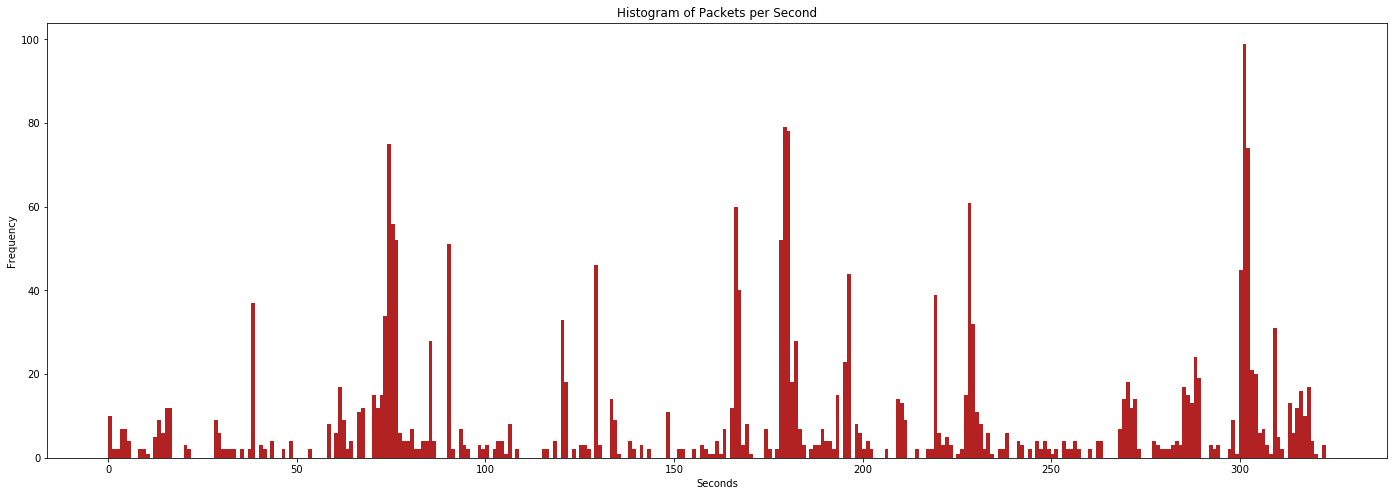

In [57]:
# Find the largest time in seconds.
# We want to graph time per second so we want a bin for each second.
max_time = math.ceil(max(timestamps))
plt.figure(figsize=(24, 8))
plt.hist(timestamps, max_time, facecolor='firebrick')
plt.ylabel('Frequency')
plt.xlabel('Seconds')
plt.title('Histogram of Packets per Second')
plt.show()

# Problem 3: Retrieving Data from the Web
**1. Read in the Wikipedia page for <a href="https://en.wikipedia.org/wiki/Portland,_Oregon">Portland, Oregon</a>. Find the table on the climate, which has the tag `Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY).` What is the structure of this node of the tree (e.g., how many children does the table have, what are their tags, etc.)?**

In [58]:
city = urllib.request.urlopen("https://en.wikipedia.org/wiki/Portland,_Oregon")
city = BeautifulSoup(city, 'html.parser')

In [59]:
clim_tab = None
city_re = re.compile("Climate data for Portland, Oregon") # We know that the table will have this string in it
# Iterate over each table.
for tab in city.find_all('table'):
    # Check the child th
    # Some tables might not have this child, so make sure there is one
    if(tab.th is not None):
        # In this child, check if the string matches "Climate data for Portland, Oregon"
        if(city_re.match(tab.th.get_text()) is not None):
            # If it does, it is the table we want, save it and leave the loop
            clim_tab = tab
            break

A table starts with a table tag (makes sense). Each row of the table starts and ends with a tr tag. Each row can have row/column headings, which is between a th tag. The value of the "scope" attribute in the th tag is either "row" or "column" to signify if the table header is either a row or a column. Under each tr tag is also some number of td tags. Td tags signify the row values, so each value in the row gets its own td tag. 

In [60]:
clim_tab

<table class="wikitable collapsible" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<tr>
<th colspan="14">Climate data for Portland, Oregon (<a href="/wiki/Portland_International_Airport" title="Portland International Airport">PDX</a>), 1981–2010 normals,<sup class="reference" id="cite_ref-83"><a href="#cite_note-83">[a]</a></sup> extremes 1940–present<sup class="reference" id="cite_ref-85"><a href="#cite_note-85">[b]</a></sup></th>
</tr>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)</th>
<td style="background: #

In [61]:
children = clim_tab.findChildren()
len(children)

335

First we get *all* of the children for our Climate Data table. There are 355 children but that takes all the tags for this table. I guess this doesn't tell us much so we will investigate more.

In [62]:
# Number of tr tags will be number of rows:
tr_tags = clim_tab.find_all('tr')

In [63]:
len(tr_tags)

16

There are 16 rows to the Climate table because each tr tag corresponds to a row and there are 16 tr tags. Next we will look at how many correspond to rows with data values and not just rows with headings.

In [64]:
num_rows = 0
num_cols = 0
for row in clim_tab.find_all('tr'):
    td_tags = row.find_all('td')
    for th in row.find_all('th'):
        try:
            # Check that it is a row and that it has data values.
            if th['scope'] == "row" and len(td_tags) > 0:
                num_rows += 1
            # Check that it is a column
            elif th['scope'] == "col":
                num_cols += 1
        # If there is no scope in the th tag, just skip to the next
        except KeyError:
            next

In [65]:
print("There are %d number of rows with data values and %d number of columns" % (num_rows, num_cols))

There are 13 number of rows with data values and 13 number of columns


**2. Write a function `retrieve_climate_table` that:**
- **Takes as an argument a Wikipedia URL**
- **Returns the `BeautifulSoup` object corresponding to the climate data table (if it exists in the page)**
- **Returns `None` if no such table exists on the page.**
- **You should check that the URL is retrieved successfully, and raise an error if `urllib3` fails to successfully read the website.**  
- **You may notice that some city pages include more than one climate data table or several nested tables (see, for example, https://en.wikipedia.org/wiki/Los_Angeles). In this case, your function may arbitrarily choose one of the tables to return as a `BeautifulSoup` object.**

For our implementation of this function, we return the first Climate Data table that we find.

In [66]:
def retrieve_climate_table(url):
    try:
        city = urllib.request.urlopen(url)
    # If the url wasn't succesfully read
    except (ValueError, urllib.error.URLError) as e:
        print("Error: could not open URL.")
        raise e
    city = BeautifulSoup(city, 'html.parser')
    # Search for the Climate Table
    city_re = re.compile("Climate data") # We know that the table will have this string in it
    # Iterate over each table.
    for tab in city.find_all('table'):
        # Check the child th
        # Some tables might not have this child, so make sure there is one
        if tab.th is not None:
            # In this child, check if the string matches "Climate data for Portland, Oregon"
            if city_re.match(tab.th.get_text()) is not None:
                # If it does, it is the table we want, save it and leave the loop
                return(tab)
        # Some cities have the table title as a caption
        if tab.caption is not None:
            if city_re.match(tab.caption.get_text()) is not None:
                return(tab)
    # If the table was not found, return None
    return(None)

In [67]:
pdx_tab = retrieve_climate_table("https://en.wikipedia.org/wiki/Portland,_Oregon")

In [68]:
la_tab = retrieve_climate_table("https://en.wikipedia.org/wiki/Los_Angeles")

In [95]:
hyd_tab = retrieve_climate_table("https://en.wikipedia.org/wiki/Hyderabad")

In [96]:
# I dont see what is different about this table...
# Should we be converting this to unicode or anything like that?
# Am I returning the right type?
bos_tab = retrieve_climate_table("https://en.wikipedia.org/wiki/Boston")

In [71]:
not_wiki = retrieve_climate_table("https://theringer.com")
not_wiki is None

True

In [72]:
bad = retrieve_climate_table("hhtps://thisaintnourl.com")

Error: could not open URL.


URLError: <urlopen error unknown url type: hhtps>

**3. As you look at some of the climate data tables, you may notice that different cities' tables contain different information. Write a function `list_climate_table_row_names` that:**   
- **Takes as an argument a Wikipedia URL**  
- **Returns a list of the row names of the climate data table**  
- **or returns `None` if no such table exists.**   
- **The list returned by your function should, ideally, consist solely of Python strings (either Unicode or ASCII), and should not include any BeautifulSoup objects or HTML**

In [98]:
def list_climate_table_row_names(url):
    # Get the table using the previous function
    city_tab = retrieve_climate_table(url)
    # If there is no table, return None
    if city_tab is None:
        return(None)
    # Else add the row names
    row_names = []
    # Iterate over the th children in the table
    for row in city_tab.find_all('th'):
        # Try to look at the scope attribute.
        # If there is no scope attr, just go to the next <th>
        try:
            if row['scope'] == "row":
                if row.get_text() is not None: 
                    row_names.append(row.get_text())
        except KeyError:
            next
    return(row_names)

In [99]:
pdx_rows = list_climate_table_row_names("https://en.wikipedia.org/wiki/Portland,_Oregon")

In [100]:
pdx_rows

['Month',
 'Record high °F (°C)',
 'Mean maximum °F (°C)',
 'Average high °F (°C)',
 'Average low °F (°C)',
 'Mean minimum °F (°C)',
 'Record low °F (°C)',
 'Average precipitation inches (mm)',
 'Average snowfall inches (cm)',
 'Average precipitation days (≥ 0.01 in)',
 'Average snowy days (≥ 0.1 in)',
 'Average relative humidity (%)',
 'Mean monthly sunshine hours',
 'Percent possible sunshine']

**4. The next natural step would be to write a function that takes a URL and a row name and retrieves the data from that row of the climate data table (if the table exists and has that row name). Doing this would require some complicated string wrangling to get right, so I'll spare you the trouble. Instead, please briey describe either in pseudo code or in plain English how you would accomplish this, using the two functions you wrote above and the tools available to you in the `BeautifulSoup` package.**

1. Use `retrieve_climate_table` to get the Climate Data table for that city.
    * If this returns `None`, return `None`.
2. Run `list_climate_table_row_names` to obtain the list of row names for the city.  
3. Check if the row name argument that was passed into the function is in the list obtained from (2).
    * If it is not, return `None`.
4. Loop through all of the tr tags in the table obtained from (1).
    * It looks like each row starts and ends with a tr tag. Within each tr tag there is a th tag that contains the information about if it is a row and what the row name is. 
    * Using the th tag, check that it is a row and if the row name matches the row name that was passed into the function (using a similar strategy as in the function body of `list_climate_table_row_names` ). 
    * Save the entire tr to and all of its children when we find the th tag that matches.
    * Break out of the loop once we find the row we are looking for.
5. Now it looks like that all of the information for our row will be contained in td tags. Iterate through all of the td tags within the saved tr tag. For each td tag, use `get_text()`, `contents` or some other function to get the information in each td tag. With each iteration, append the information onto a list.
6. Return the list.

### Problem 4: Relational Databases and SQL
For this problem we will use the toy SQLite database, called Chinook. The Chinook database represents a digital music collection.  
**1. Load the database using the Python `sqlite3` package. How many tables are in the database?**

In [101]:
import sqlite3

In [102]:
conn = sqlite3.connect("Chinook_Sqlite.sqlite")
c = conn.cursor()

In [107]:
num_tables = 0
table_names = []
for r in c.execute("select name from sqlite_master where type = 'table'"):
    table_names.append(r)
    num_tables += 1

In [108]:
num_tables

11

There are 11 tables in this database.

**2. What are the names of the tables in the database?**

In [109]:
table_names

[('Album',),
 ('Artist',),
 ('Customer',),
 ('Employee',),
 ('Genre',),
 ('Invoice',),
 ('InvoiceLine',),
 ('MediaType',),
 ('Playlist',),
 ('PlaylistTrack',),
 ('Track',)]

Above we see the names of the 11 tables.

**3. Write a function `list_album_ids_by_letter` that:**
- **takes as an argument a single character**
- **returns a list of the primary keys of all the albums whose titles start with that character.**  
**Your function should ignore case, so that the inputs "a" and "A" yield the same results.**  
- **How many albums are there in the database with titles starting with "C"?**   
- **How many albums are there in the database with titles starting with "M"?**

In [110]:
# Find out a little more about this Album table
albs = c.execute("""select * from Album LIMIT 5""")
print(albs.description)
albs.fetchall()

(('AlbumId', None, None, None, None, None, None), ('Title', None, None, None, None, None, None), ('ArtistId', None, None, None, None, None, None))


[(1, 'For Those About To Rock We Salute You', 1),
 (2, 'Balls to the Wall', 2),
 (3, 'Restless and Wild', 2),
 (4, 'Let There Be Rock', 1),
 (5, 'Big Ones', 3)]

We see that the column that we are going to want is `AlbumId`, that is our primary key. The Album name is called `Title`.

In [111]:
def list_album_ids_by_letter(char):
    if not isinstance(char, str):
        raise TypeError("c must be a character.")
    elif len(char) != 1:
        raise ValueError("c must only be one character long.")
    # Make the c lower case
    char = char.lower()
    # Run SQL Statement
    albs = c.execute("""select AlbumId from Album where substr(lower(Title),1,1) == ?""", (char,))
    # Add to a list
    albs_li = []
    for a in albs:
        for t in a:
            albs_li.append(t)
    return(albs_li)

In [112]:
a = list_album_ids_by_letter("c")
a

[19,
 27,
 32,
 33,
 34,
 54,
 55,
 56,
 57,
 58,
 124,
 128,
 165,
 191,
 195,
 206,
 246,
 260,
 270,
 295,
 301,
 323,
 328]

**How many albums are there in the database with titles starting with "C"?**

In [ ]:
c_albs = list_album_ids_by_letter("c")
len(c_albs)

There are 23 albums in the database with titles starting with "C".

**How many albums are there in the database with titles starting with "M"?**

In [ ]:
m = list_album_ids_by_letter("M")
len(m)

There are 25 albums in the database with titles starting with "M"

**4. Write a function `list_song_ids_by_album_letter` that:** 
- **takes as an argument a single character**
- **returns a list of the primary keys of all the songs whose album names begin with that letter (again ignoring case).** 
- **How many songs are in all the albums whose titles begin with the letter "N"?** 
- **How many songs are in all the albums whose titles begin with the letter "D"?** 

In [ ]:
# Get information about the songs
songs = c.execute("""select * from Track""")
songs.description

In [ ]:
def list_song_ids_by_album_letter(char):
    if not isinstance(char, str):
        raise TypeError("c must be a character.")
    elif len(char) != 1:
        raise ValueError("c must only be one character long.")
    # Make the c lower case
    char = char.lower()
    # SQL statement
    song_ids = c.execute("""select TrackId from Track t
                        left join Album a on a.AlbumId = t.AlbumId
                        where substr(lower(a.Title),1,1) ==  ?""", (char,))
    # Add to a list
    songs_li = []
    for s in song_ids:
        for t in s:
            songs_li.append(t)
    return(songs_li)

**How many songs are in all the albums whose titles begin with the letter "N"?**

In [ ]:
n_songs = list_song_ids_by_album_letter("N")
len(n_songs)

There are 74 songs in all albums whose titles begin with the letter "N"!

**How many songs are in all the albums whose titles begin with the letter "D"?** 

In [ ]:
d_songs = list_song_ids_by_album_letter("D")
len(d_songs)

There are 106 songs in all albums whose titles beging with the letter "D"!

**5. Write a function `total_cost_by_album_letter` that:** 
- **takes as an argument a single character**
- **returns the cost of buying every song whose album begins with that letter (ignoring case).** 
- **This cost should be based on the tracks' unit prices, so that the cost of buying a set of tracks is simply the sum of the unit price of all the tracks in the set.** 
- **What would it cost to buy all tracks in the database whose albums begin with "L"?**

In [ ]:
def total_cost_by_album_letter(char):
    if not isinstance(char, str):
        raise TypeError("c must be a character.")
    elif len(char) != 1:
        raise ValueError("c must only be one character long.")
    # Make the c lower case
    char = char.lower()
    # SQL statement
    song_price = c.execute("""select sum(UnitPrice) from Track t
                        left join Album a on a.AlbumId = t.AlbumId
                        where substr(lower(a.Title),1,1) ==  ? """, (char,))
    return(song_price.fetchall()[0][0])

In [ ]:
total_cost_by_album_letter("L")

The total cost to buy all tracks in the database whose albums begin with "L" is $350.39